# **1. Perkenalan Dataset**


Tahap pertama, Anda harus mencari dan menggunakan dataset dengan ketentuan sebagai berikut:

1. **Sumber Dataset**:  
   Dataset dapat diperoleh dari berbagai sumber, seperti public repositories (*Kaggle*, *UCI ML Repository*, *Open Data*) atau data primer yang Anda kumpulkan sendiri.


# **2. Import Library**

Pada tahap ini, Anda perlu mengimpor beberapa pustaka (library) Python yang dibutuhkan untuk analisis data dan pembangunan model machine learning atau deep learning.

In [45]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split

# **3. Memuat Dataset**

Pada tahap ini, Anda perlu memuat dataset ke dalam notebook. Jika dataset dalam format CSV, Anda bisa menggunakan pustaka pandas untuk membacanya. Pastikan untuk mengecek beberapa baris awal dataset untuk memahami strukturnya dan memastikan data telah dimuat dengan benar.

Jika dataset berada di Google Drive, pastikan Anda menghubungkan Google Drive ke Colab terlebih dahulu. Setelah dataset berhasil dimuat, langkah berikutnya adalah memeriksa kesesuaian data dan siap untuk dianalisis lebih lanjut.

Jika dataset berupa unstructured data, silakan sesuaikan dengan format seperti kelas Machine Learning Pengembangan atau Machine Learning Terapan

In [2]:
df = pd.read_csv('Sleep_health_and_lifestyle_dataset.csv')
df.head()

,Person ID,Gender,Age,Occupation,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,BMI Category,Blood Pressure,Heart Rate,Daily Steps,Sleep Disorder
0,1,Male,27,Software Engineer,6.1,6,42,6,Overweight,126/83,77,4200,NaN
1,2,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,NaN
2,3,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,NaN
3,4,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea
4,5,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea


In [3]:
print("\nInformasi dataset:")
df.info()


Informasi dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 374 entries, 0 to 373
Data columns (total 13 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Person ID                374 non-null    int64  
 1   Gender                   374 non-null    object 
 2   Age                      374 non-null    int64  
 3   Occupation               374 non-null    object 
 4   Sleep Duration           374 non-null    float64
 5   Quality of Sleep         374 non-null    int64  
 6   Physical Activity Level  374 non-null    int64  
 7   Stress Level             374 non-null    int64  
 8   BMI Category             374 non-null    object 
 9   Blood Pressure           374 non-null    object 
 10  Heart Rate               374 non-null    int64  
 11  Daily Steps              374 non-null    int64  
 12  Sleep Disorder           155 non-null    object 
dtypes: float64(1), int64(7), object(5)
memory usage: 38.1+ KB


In [4]:
print("\nMissing values per fitur:")
df.isnull().sum()


Missing values per fitur:


,0
Person ID,0
Gender,0
Age,0
Occupation,0
Sleep Duration,0
Quality of Sleep,0
Physical Activity Level,0
Stress Level,0
BMI Category,0
Blood Pressure,0


In [5]:
# Hapus kolom 'Person ID'
df = df.drop(columns=['Person ID'])

# Tampilkan DataFrame untuk memastikan kolom telah dihapus
df.head()

,Gender,Age,Occupation,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,BMI Category,Blood Pressure,Heart Rate,Daily Steps,Sleep Disorder
0,Male,27,Software Engineer,6.1,6,42,6,Overweight,126/83,77,4200,NaN
1,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,NaN
2,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,NaN
3,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea
4,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea


In [6]:
df.describe()

,Age,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,Heart Rate,Daily Steps
count,374.000000,374.000000,374.000000,374.000000,374.000000,374.000000,374.000000
mean,42.184492,7.132086,7.312834,59.171123,5.385027,70.165775,6816.844920
std,8.673133,0.795657,1.196956,20.830804,1.774526,4.135676,1617.915679
min,27.000000,5.800000,4.000000,30.000000,3.000000,65.000000,3000.000000
25%,35.250000,6.400000,6.000000,45.000000,4.000000,68.000000,5600.000000
50%,43.000000,7.200000,7.000000,60.000000,5.000000,70.000000,7000.000000
75%,50.000000,7.800000,8.000000,75.000000,7.000000,72.000000,8000.000000
max,59.000000,8.500000,9.000000,90.000000,8.000000,86.000000,10000.000000


# **4. Exploratory Data Analysis (EDA)**

Pada tahap ini, Anda akan melakukan **Exploratory Data Analysis (EDA)** untuk memahami karakteristik dataset.

Tujuan dari EDA adalah untuk memperoleh wawasan awal yang mendalam mengenai data dan menentukan langkah selanjutnya dalam analisis atau pemodelan.

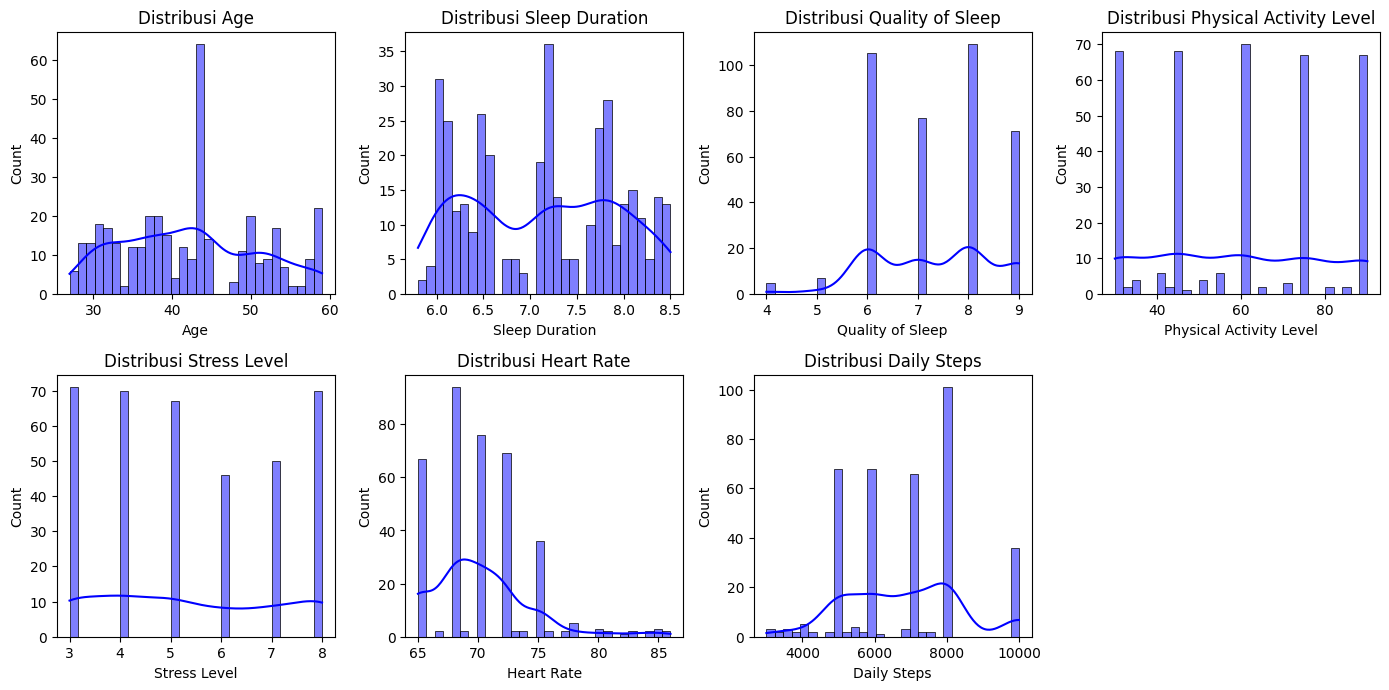

In [7]:
# Distribusi fitur numerik
num_features = df.select_dtypes(include=[np.number])
plt.figure(figsize=(14, 10))
for i, column in enumerate(num_features.columns, 1):
    plt.subplot(3, 4, i)
    sns.histplot(df[column], bins=30, kde=True, color='blue')
    plt.title(f'Distribusi {column}')
plt.tight_layout()
plt.show()

/tmp/ipython-input-8-3149358019.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y=df[column], palette='viridis')
/tmp/ipython-input-8-3149358019.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y=df[column], palette='viridis')
/tmp/ipython-input-8-3149358019.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y=df[column], palette='viridis')
/tmp/ipython-input-8-3149358019.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legen

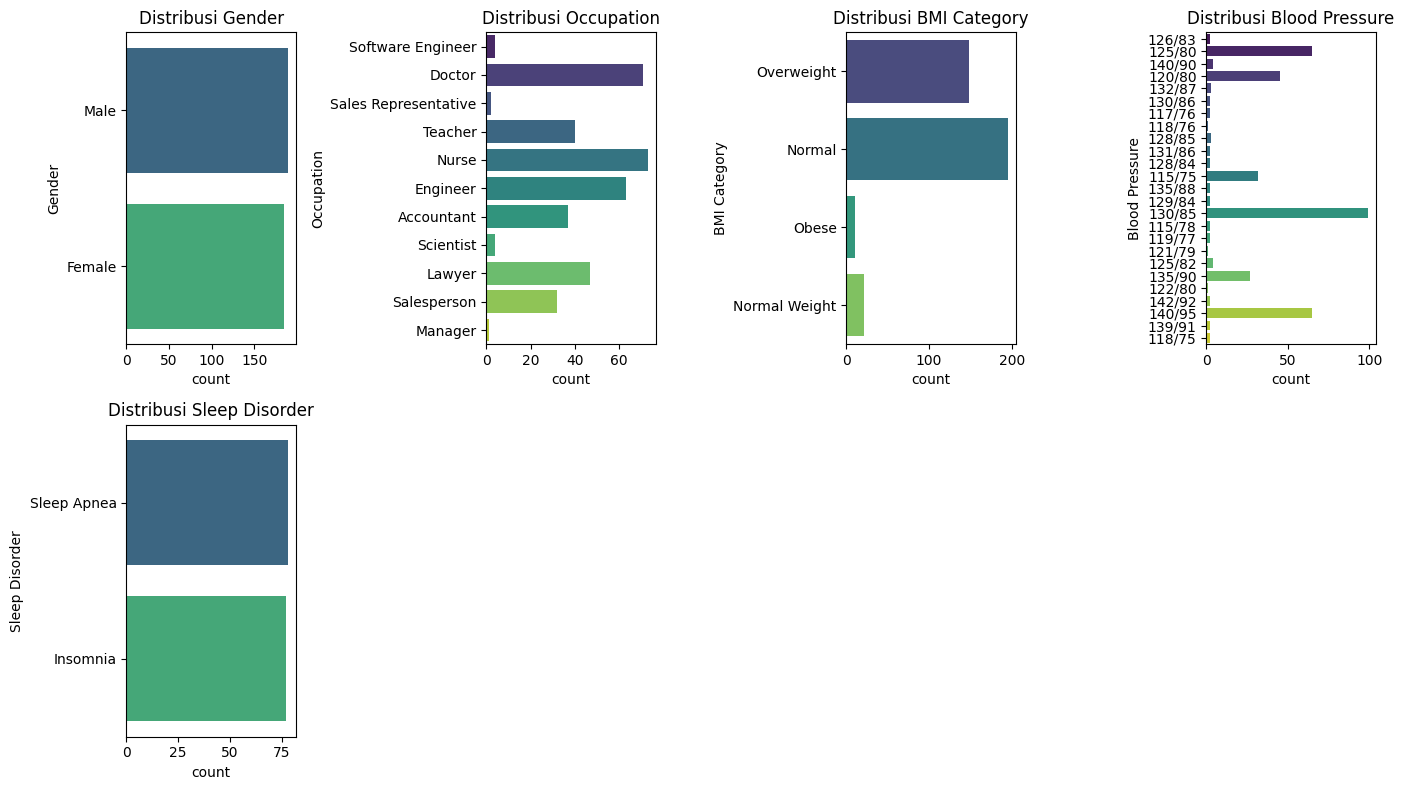

In [8]:
# Distribusi fitur kategorikal
cat_features = df.select_dtypes(include=[object])
plt.figure(figsize=(14, 8))
for i, column in enumerate(cat_features.columns, 1):
    plt.subplot(2, 4, i)
    sns.countplot(y=df[column], palette='viridis')
    plt.title(f'Distribusi {column}')
plt.tight_layout()
plt.show()

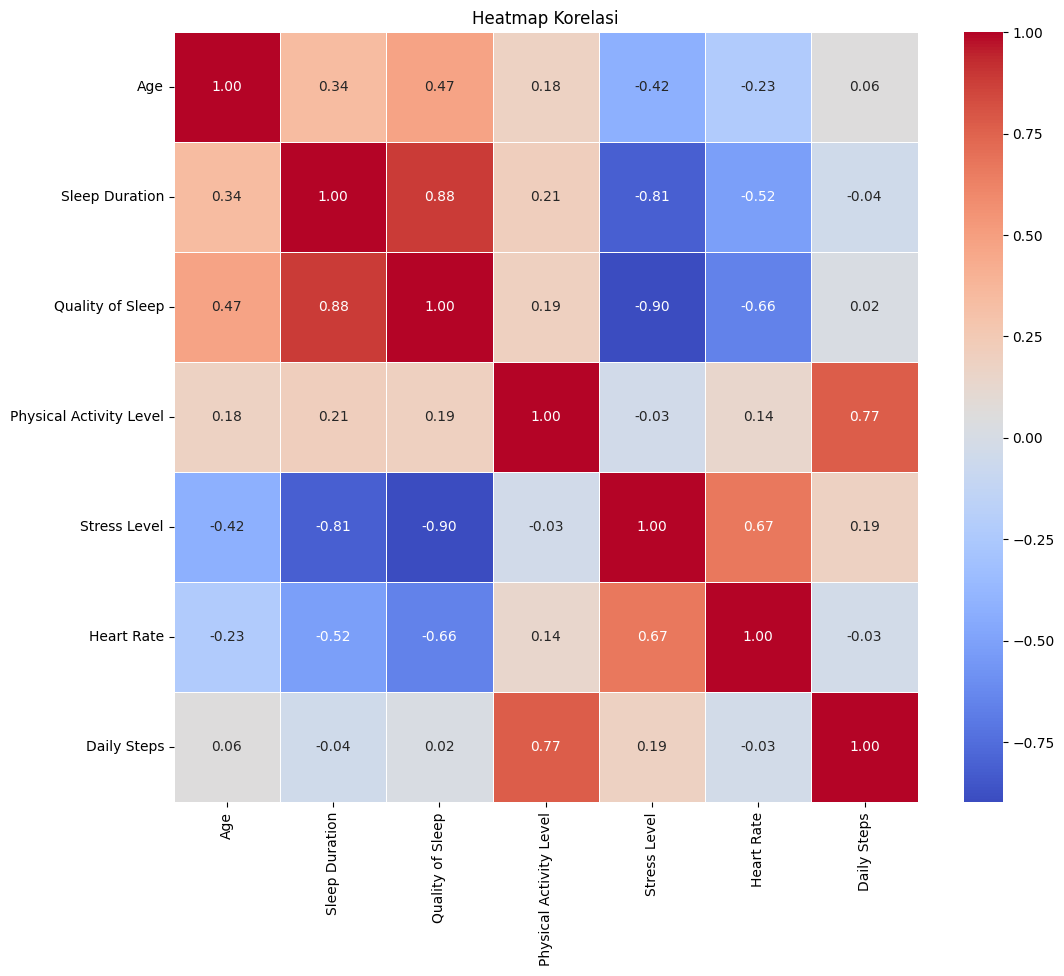

In [9]:
# Heatmap korelasi untuk fitur numerik
plt.figure(figsize=(12, 10))
correlation_matrix = num_features.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Heatmap Korelasi')
plt.show()

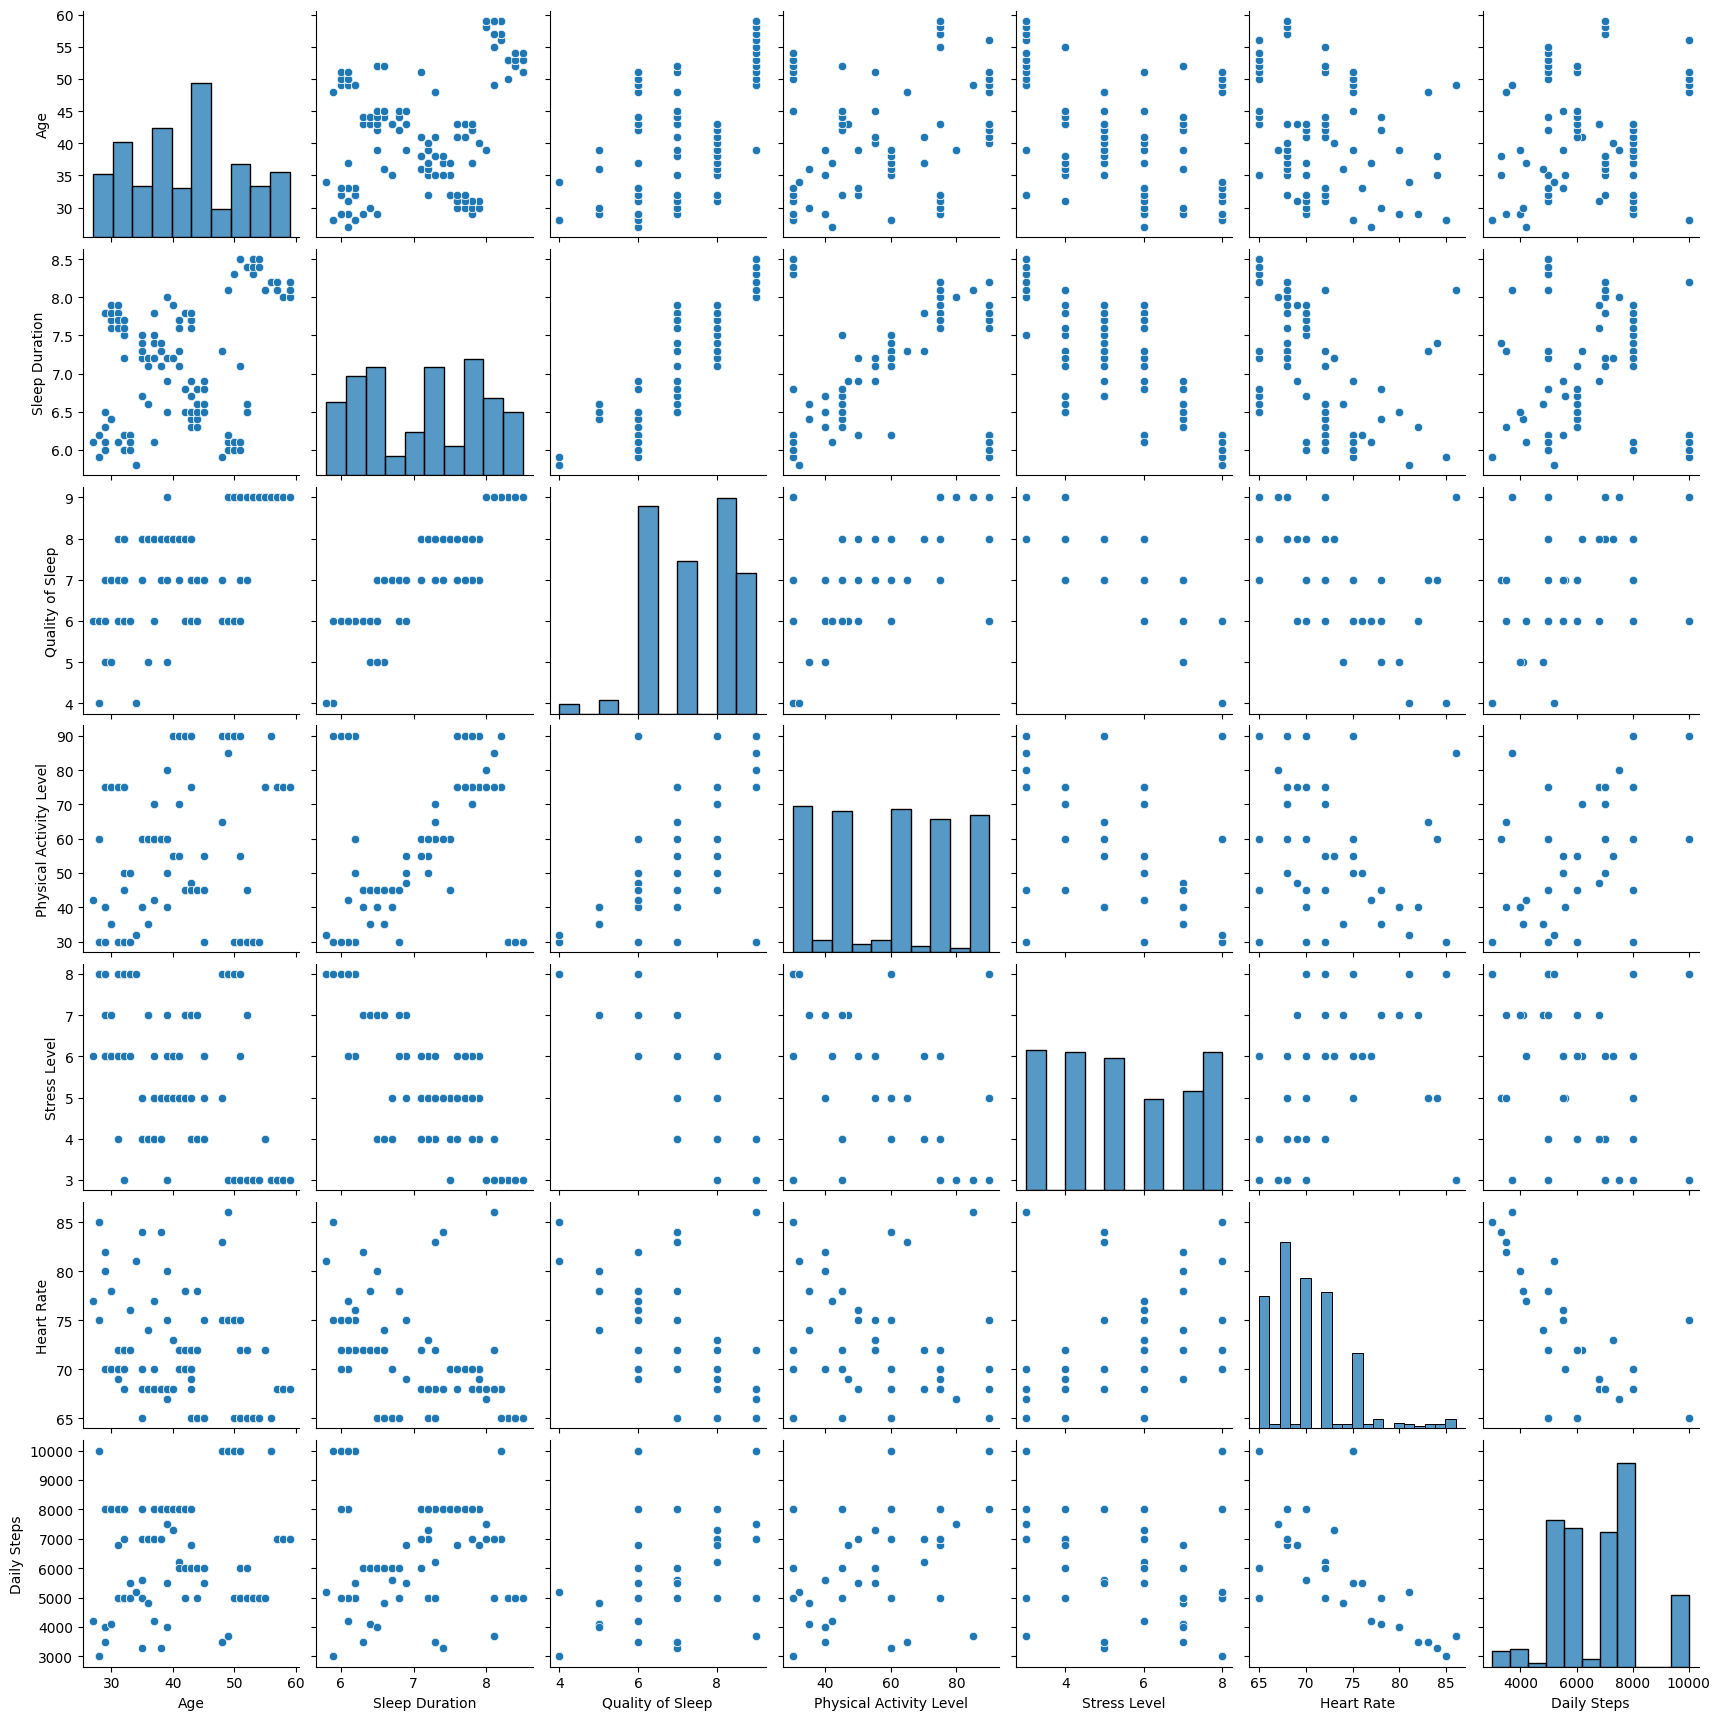

In [10]:
# Pairplot untuk fitur numerik
sns.pairplot(num_features)
plt.show()

/tmp/ipython-input-11-2991658023.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Sleep Disorder', data=df, palette='viridis')


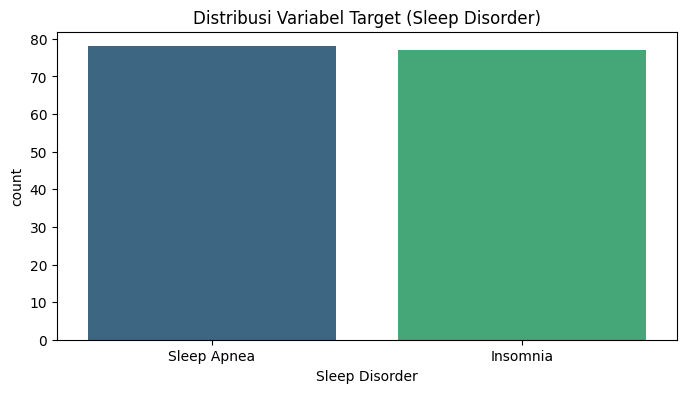

In [11]:
# Visualisasi distribusi variabel target
plt.figure(figsize=(8, 4))
sns.countplot(x='Sleep Disorder', data=df, palette='viridis')
plt.title('Distribusi Variabel Target (Sleep Disorder)')
plt.show()

# **5. Data Preprocessing**

Pada tahap ini, data preprocessing adalah langkah penting untuk memastikan kualitas data sebelum digunakan dalam model machine learning.

Jika Anda menggunakan data teks, data mentah sering kali mengandung nilai kosong, duplikasi, atau rentang nilai yang tidak konsisten, yang dapat memengaruhi kinerja model. Oleh karena itu, proses ini bertujuan untuk membersihkan dan mempersiapkan data agar analisis berjalan optimal.

Berikut adalah tahapan-tahapan yang bisa dilakukan, tetapi **tidak terbatas** pada:
1. Menghapus atau Menangani Data Kosong (Missing Values)
2. Menghapus Data Duplikat
3. Normalisasi atau Standarisasi Fitur
4. Deteksi dan Penanganan Outlier
5. Encoding Data Kategorikal
6. Binning (Pengelompokan Data)

Cukup sesuaikan dengan karakteristik data yang kamu gunakan yah. Khususnya ketika kami menggunakan data tidak terstruktur.

In [12]:
df = df.dropna()
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 155 entries, 3 to 373
Data columns (total 12 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Gender                   155 non-null    object 
 1   Age                      155 non-null    int64  
 2   Occupation               155 non-null    object 
 3   Sleep Duration           155 non-null    float64
 4   Quality of Sleep         155 non-null    int64  
 5   Physical Activity Level  155 non-null    int64  
 6   Stress Level             155 non-null    int64  
 7   BMI Category             155 non-null    object 
 8   Blood Pressure           155 non-null    object 
 9   Heart Rate               155 non-null    int64  
 10  Daily Steps              155 non-null    int64  
 11  Sleep Disorder           155 non-null    object 
dtypes: float64(1), int64(6), object(5)
memory usage: 15.7+ KB


In [13]:
df[['Systolic_BP', 'Diastolic_BP']] = df['Blood Pressure'].str.split('/', expand=True)

# Mengubah tipe data kolom baru menjadi numerik (integer)
df['Systolic_BP'] = pd.to_numeric(df['Systolic_BP'])
df['Diastolic_BP'] = pd.to_numeric(df['Diastolic_BP'])

df = df.drop('Blood Pressure', axis=1)

In [14]:
# Buat instance LabelEncoder
label_encoder = LabelEncoder()

# List kolom kategorikal yang perlu di-encode
categorical_columns = ['Gender', 'Occupation', 'BMI Category', 'Sleep Disorder']

# Encode kolom kategorikal
for column in categorical_columns:
    df[column] = label_encoder.fit_transform(df[column])

# Tampilkan DataFrame untuk memastikan encoding telah diterapkan
df.head()

,Gender,Age,Occupation,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,BMI Category,Heart Rate,Daily Steps,Sleep Disorder,Systolic_BP,Diastolic_BP
3,1,28,5,5.9,4,30,8,2,85,3000,1,140,90
4,1,28,5,5.9,4,30,8,2,85,3000,1,140,90
5,1,28,8,5.9,4,30,8,2,85,3000,0,140,90
6,1,29,9,6.3,6,40,7,2,82,3500,0,140,90
16,0,29,4,6.5,5,40,7,1,80,4000,1,132,87


In [25]:
numeric_columns = ['Age', 'Sleep Duration', 'Quality of Sleep', 'Physical Activity Level', 'Stress Level', 'Heart Rate', 'Daily Steps']

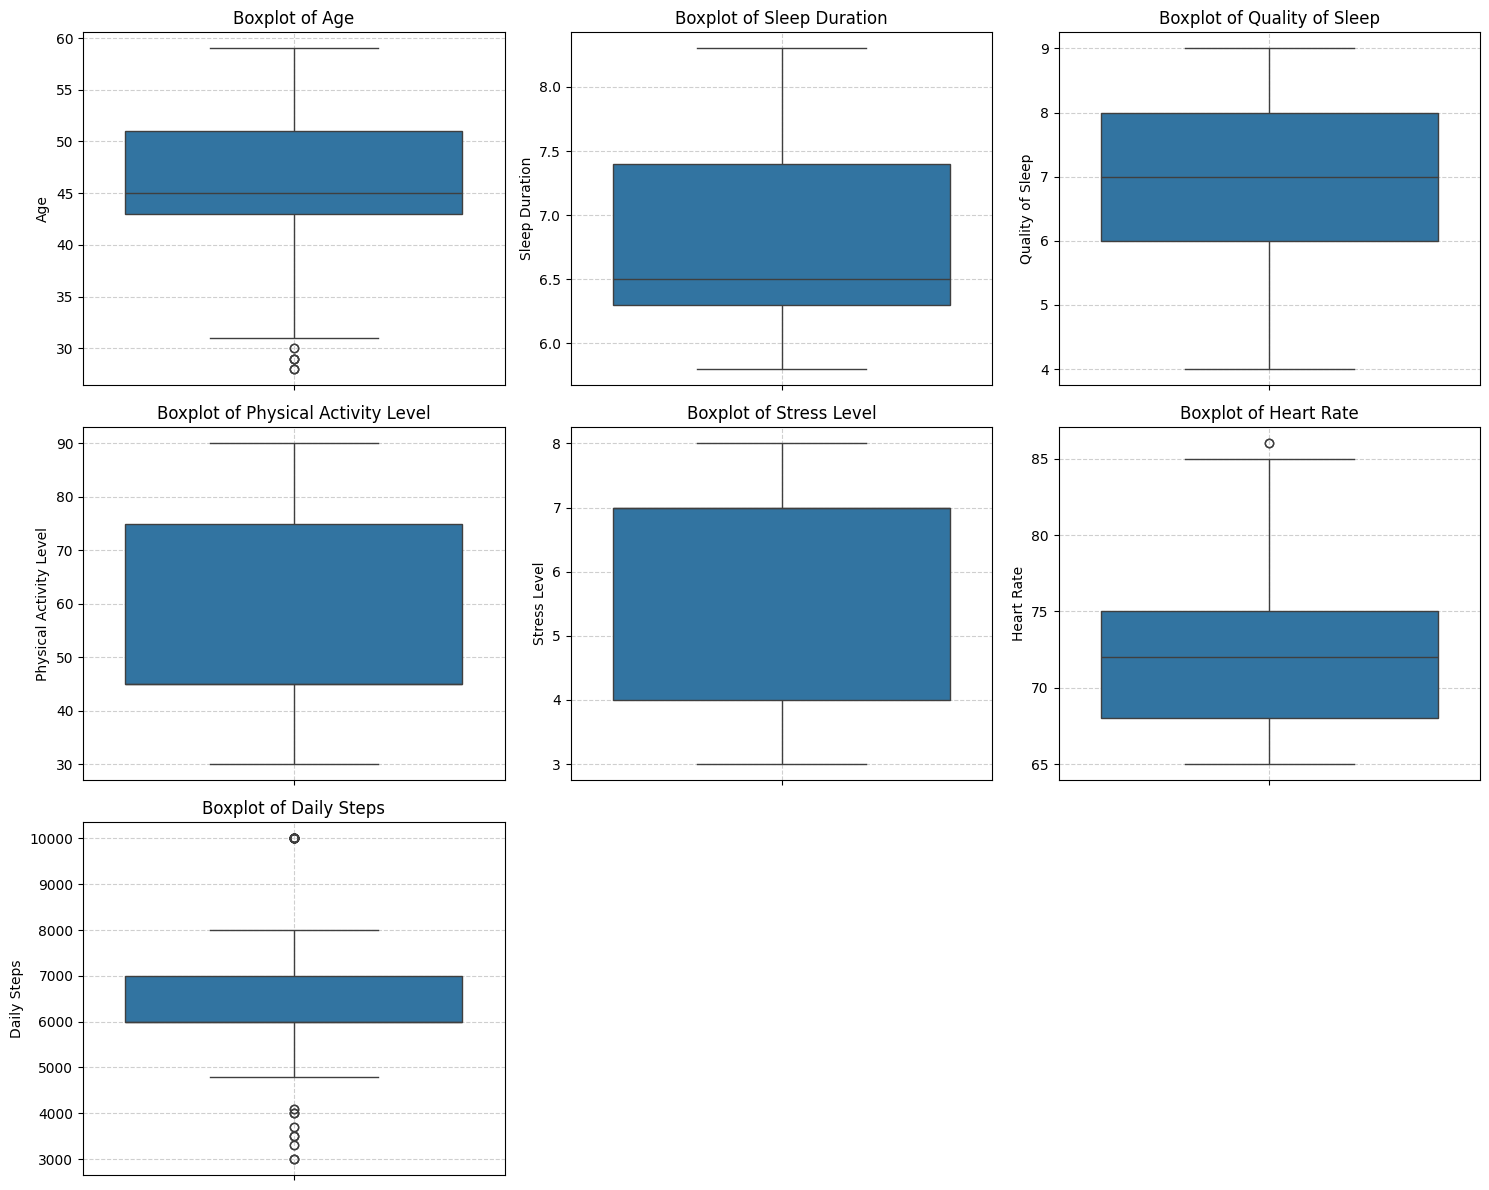

In [27]:
# Tentukan jumlah baris dan kolom untuk subplot (misal: 3 baris, 3 kolom jika ada 7 fitur)
n_cols = 3
n_rows = (len(numeric_columns) + n_cols - 1) // n_cols # Menghitung baris yang dibutuhkan

plt.figure(figsize=(n_cols * 5, n_rows * 4)) # Ukuran figure keseluruhan

for i, col in enumerate(numeric_columns):
    plt.subplot(n_rows, n_cols, i + 1) # Menentukan posisi subplot
    sns.boxplot(y=df[col])
    plt.title(f'Boxplot of {col}')
    plt.ylabel(col)
    plt.grid(True, linestyle='--', alpha=0.6)

plt.tight_layout() # Mengatur tata letak agar tidak tumpang tindih
plt.show()

In [32]:
df.describe(include='all')

,Gender,Age,Occupation,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,BMI Category,Heart Rate,Daily Steps,Sleep Disorder,Systolic_BP,Diastolic_BP
count,155.000000,155.000000,155.000000,155.000000,155.000000,155.000000,155.000000,155.000000,155.000000,155.000000,155.000000,155.000000,155.000000
mean,0.335484,46.632258,5.038710,6.812258,6.870968,60.896774,5.767742,2.651613,71.787097,6765.806452,0.503226,134.922581,89.806452
std,0.473690,7.839311,2.506832,0.773534,1.337325,20.634158,1.946757,0.864852,5.187381,1893.921881,0.501610,5.396651,4.868527
min,0.000000,28.000000,0.000000,5.800000,4.000000,30.000000,3.000000,0.000000,65.000000,3000.000000,0.000000,115.000000,75.000000
25%,0.000000,43.000000,4.000000,6.300000,6.000000,45.000000,4.000000,3.000000,68.000000,6000.000000,0.000000,130.000000,85.000000
50%,0.000000,45.000000,4.000000,6.500000,7.000000,45.000000,7.000000,3.000000,72.000000,6000.000000,1.000000,135.000000,90.000000
75%,1.000000,51.000000,6.000000,7.400000,8.000000,75.000000,7.000000,3.000000,75.000000,7000.000000,1.000000,140.000000,95.000000
max,1.000000,59.000000,9.000000,8.300000,9.000000,90.000000,8.000000,3.000000,86.000000,10000.000000,1.000000,142.000000,95.000000


In [42]:
scaler = StandardScaler()

col_to_standarize = ['Age', 'Sleep Duration', 'Quality of Sleep', 'Physical Activity Level', 'Stress Level', 'Heart Rate', 'Daily Steps', 'Systolic_BP',	'Diastolic_BP']

df[col_to_standarize] = scaler.fit_transform(df[col_to_standarize])

In [43]:
df.describe(include='all')

,Gender,Age,Occupation,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,BMI Category,Heart Rate,Daily Steps,Sleep Disorder,Systolic_BP,Diastolic_BP
count,155.000000,155.000000,155.000000,1.550000e+02,1.550000e+02,155.000000,1.550000e+02,155.000000,155.000000,1.550000e+02,155.000000,1.550000e+02,1.550000e+02
mean,0.335484,0.000000,5.038710,6.876220e-17,-1.375244e-16,0.000000,-4.584147e-17,2.651613,0.000000,-9.168293e-17,0.503226,-2.429598e-15,-1.191878e-15
std,0.473690,1.003241,2.506832,1.003241e+00,1.003241e+00,1.003241,1.003241e+00,0.864852,1.003241,1.003241e+00,0.501610,1.003241e+00,1.003241e+00
min,0.000000,-2.384477,0.000000,-1.312856e+00,-2.153758e+00,-1.502214,-1.426328e+00,0.000000,-1.312627,-1.994809e+00,0.000000,-3.703623e+00,-3.051117e+00
25%,0.000000,-0.464841,4.000000,-6.643772e-01,-6.533873e-01,-0.772908,-9.109880e-01,3.000000,-0.732426,-4.056602e-01,0.000000,-9.151115e-01,-9.904498e-01
50%,0.000000,-0.208889,4.000000,-4.049856e-01,9.679812e-02,-0.772908,6.350318e-01,3.000000,0.041176,-4.056602e-01,1.000000,1.439232e-02,3.988389e-02
75%,1.000000,0.558965,6.000000,7.622766e-01,8.469835e-01,0.685705,6.350318e-01,3.000000,0.621377,1.240562e-01,1.000000,9.438962e-01,1.070218e+00
max,1.000000,1.582771,9.000000,1.929539e+00,1.597169e+00,1.415011,1.150372e+00,3.000000,2.748781,1.713205e+00,1.000000,1.315698e+00,1.070218e+00


In [46]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 155 entries, 3 to 373
Data columns (total 13 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Gender                   155 non-null    int64  
 1   Age                      155 non-null    float64
 2   Occupation               155 non-null    int64  
 3   Sleep Duration           155 non-null    float64
 4   Quality of Sleep         155 non-null    float64
 5   Physical Activity Level  155 non-null    float64
 6   Stress Level             155 non-null    float64
 7   BMI Category             155 non-null    int64  
 8   Heart Rate               155 non-null    float64
 9   Daily Steps              155 non-null    float64
 10  Sleep Disorder           155 non-null    int64  
 11  Systolic_BP              155 non-null    float64
 12  Diastolic_BP             155 non-null    float64
dtypes: float64(9), int64(4)
memory usage: 17.0 KB


In [47]:
X = df.drop('Sleep Disorder', axis=1)
y = df['Sleep Disorder']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)